# R script

***
###   

In [1]:
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


## 1. RNALight

In [2]:
RNALight_test_set <- read.csv("./RNA-Light_mRNA/Evaluation_Result/mRNA_sublocation_TestSet_RNA-Light_predict.tsv",sep = '\t')
RNALight_test_set_df <- RNALight_test_set[,c(1,4,5)]
RNALight_test_set_df$tag <- factor(RNALight_test_set_df$tag,levels = c(1,0),labels= c("Nuc","Cyto"))
RNALight_test_set_df$predict_label <- factor(RNALight_test_set_df$predict_label,levels = c(1,0),labels= c("Nuc","Cyto"))
RNALight_freq = as.data.frame(table(RNALight_test_set_df[,2:3]))

In [3]:
RNALight_freq

tag,predict_label,Freq
<fct>,<fct>,<int>
Nuc,Nuc,134
Cyto,Nuc,46
Nuc,Cyto,94
Cyto,Cyto,244


In [4]:
# Normalization
RNALight_freq$Norm_Freq=0

# TP and FP
RNALight_freq[c(1,3),]$Norm_Freq <- RNALight_freq[c(1,3),]$Freq /sum(RNALight_freq[c(1,3),]$Freq)
# TN and FN
RNALight_freq[c(2,4),]$Norm_Freq <- RNALight_freq[c(2,4),]$Freq /sum(RNALight_freq[c(2,4),]$Freq)

RNALight_freq

tag,predict_label,Freq,Norm_Freq
<fct>,<fct>,<int>,<dbl>
Nuc,Nuc,134,0.5877193
Cyto,Nuc,46,0.1586207
Nuc,Cyto,94,0.4122807
Cyto,Cyto,244,0.8413793


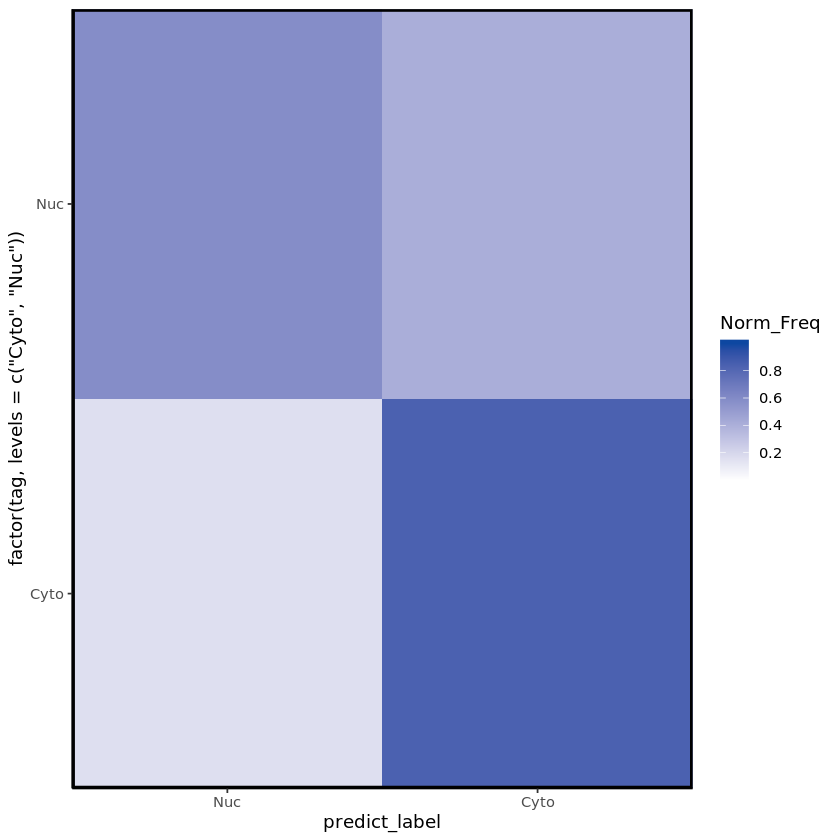

In [5]:
p <- ggplot(data =RNALight_freq,aes(x=predict_label,y=factor(tag,levels = c("Cyto","Nuc")),fill=Norm_Freq)) + 
geom_tile()+
theme_classic()+
theme(panel.border = element_rect(colour = "black", fill=NA,size = 1.5))+
scale_y_discrete(expand = c(0,0))+
scale_x_discrete(expand = c(0,0))+
scale_fill_gradient(limits = c(0,1), breaks = c(0.2,0.4,0.6,0.8),low = "white", high = "#0D47A1")
ggsave("./02_RNA-Light_Confusion_matrix_with_text.pdf", p, width = 10, height = 10) 

p

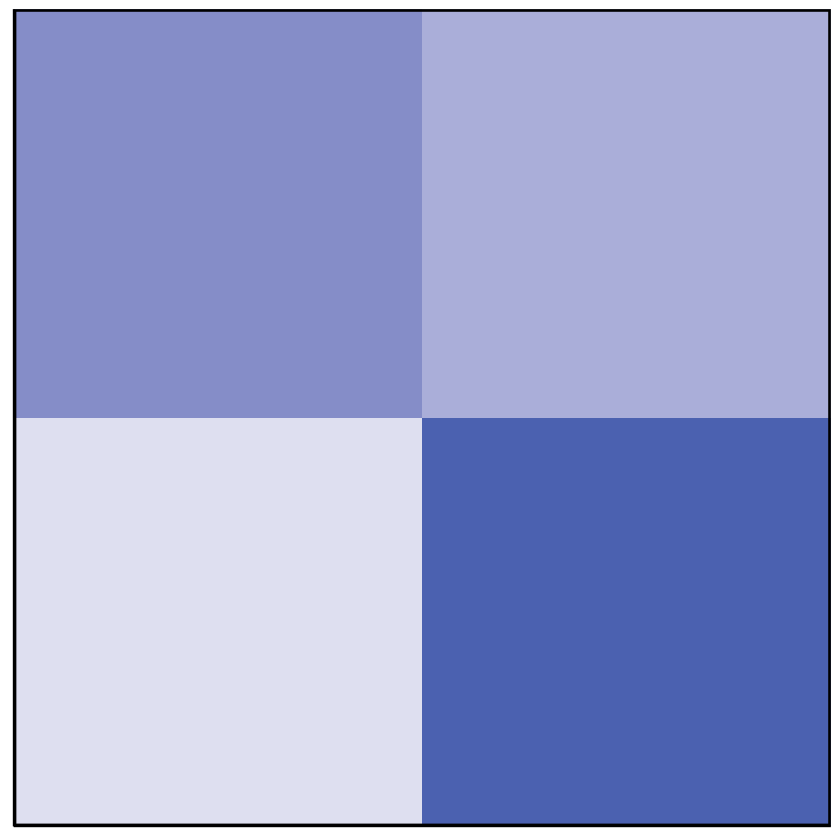

In [6]:
p <- p +theme(legend.position = "None",
         axis.text = element_blank(),
         axis.title = element_blank(),
         axis.ticks = element_blank())
ggsave("./02_RNA-Light_Confusion_matrix.pdf", p, width = 10, height = 10) 

p

*** 
###  

## 2. iloc-mRNA

In [8]:
iLoc_test_set <- read.csv("./iLoc-mRNA/Linux/Evaluation_Result/mRNA_sublocation_TestSet_iLoc-mRNA_predict.tsv",sep = '\t')
iLoc_test_set$tag <- factor(iLoc_test_set$tag,levels = c(1,0),labels= c("Nuc","Cyto"))
iLoc_test_set$predict_label <- factor(iLoc_test_set$predict_label,levels = c(1,0),labels= c("Nuc","Cyto"))
iLoc_freq = as.data.frame(table(iLoc_test_set[,2:3]))

In [9]:
iLoc_freq

tag,predict_label,Freq
<fct>,<fct>,<int>
Nuc,Nuc,21
Cyto,Nuc,7
Nuc,Cyto,207
Cyto,Cyto,283


In [10]:
# Normalization
iLoc_freq$Norm_Freq=0

# TP and FP
iLoc_freq[c(1,3),]$Norm_Freq <- iLoc_freq[c(1,3),]$Freq /sum(iLoc_freq[c(1,3),]$Freq)
# TN and FN
iLoc_freq[c(2,4),]$Norm_Freq <- iLoc_freq[c(2,4),]$Freq /sum(iLoc_freq[c(2,4),]$Freq)

iLoc_freq

tag,predict_label,Freq,Norm_Freq
<fct>,<fct>,<int>,<dbl>
Nuc,Nuc,21,0.09210526
Cyto,Nuc,7,0.02413793
Nuc,Cyto,207,0.90789474
Cyto,Cyto,283,0.97586207


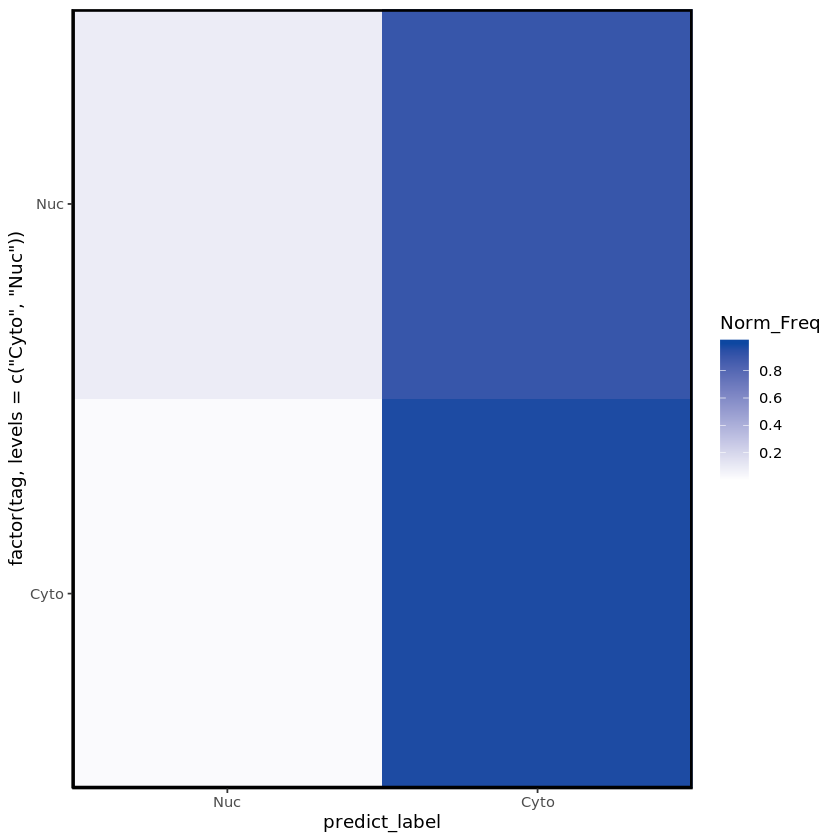

In [11]:
p <- ggplot(data =iLoc_freq,aes(x=predict_label,y=factor(tag,levels = c("Cyto","Nuc")),fill=Norm_Freq)) + 
geom_tile()+
theme_classic()+
theme(panel.border = element_rect(colour = "black", fill=NA,size = 1.5))+
scale_y_discrete(expand = c(0,0))+
scale_x_discrete(expand = c(0,0))+
scale_fill_gradient(limits = c(0,1), breaks = c(0.2,0.4,0.6,0.8),low = "white", high = "#0D47A1")
ggsave("./02_iLoc-mRNA_Confusion_matrix_with_text.pdf", p, width = 10, height = 10) 

p

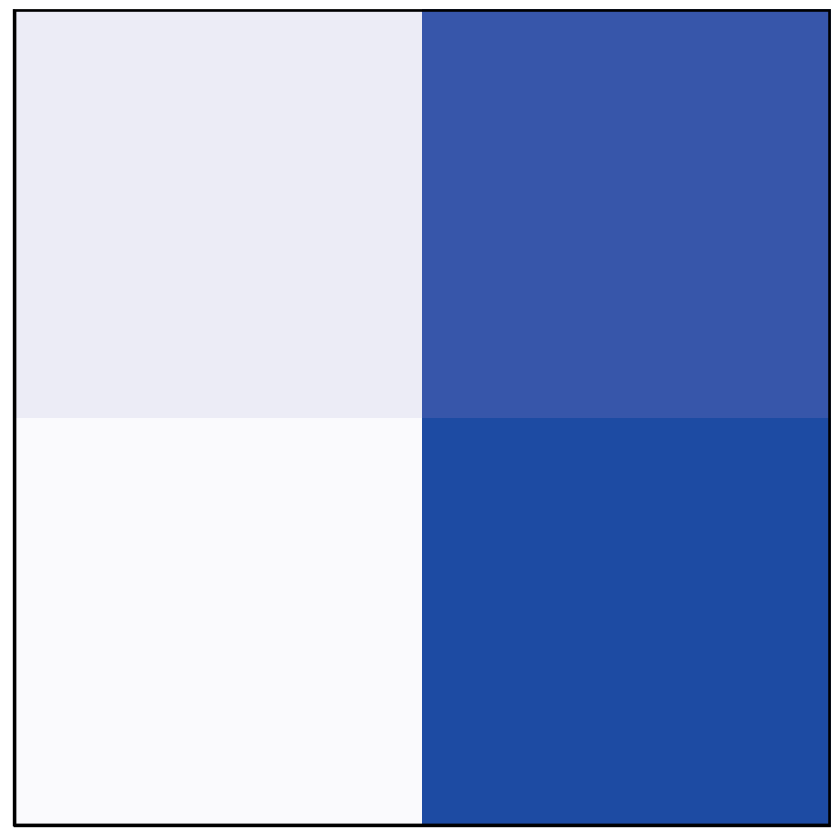

In [12]:
p <- p +theme(legend.position = "None",
         axis.text = element_blank(),
         axis.title = element_blank(),
         axis.ticks = element_blank())
ggsave("./02_iLoc-mRNA_Confusion_matrix.pdf", p, width = 10, height = 10) 

p

*** 
### 

## 3. mRNALoc

In [13]:
mRNALoc_test_set <- read.csv("./mRNALoc/Evaluation_Result/mRNA_sublocation_TestSet_mRNALoc_predict.tsv",sep = '\t')
mRNALoc_test_set$tag <- factor(mRNALoc_test_set$tag,levels = c(1,0),labels= c("Nuc","Cyto"))
mRNALoc_test_set$predict_label <- factor(mRNALoc_test_set$predict_label,levels = c(1,0),labels= c("Nuc","Cyto"))
mRNALoc_freq = as.data.frame(table(mRNALoc_test_set[,2:3]))

In [14]:
mRNALoc_freq

tag,predict_label,Freq
<fct>,<fct>,<int>
Nuc,Nuc,73
Cyto,Nuc,70
Nuc,Cyto,155
Cyto,Cyto,220


In [15]:
# Normalization
mRNALoc_freq$Norm_Freq=0

# TP and FP
mRNALoc_freq[c(1,3),]$Norm_Freq <- mRNALoc_freq[c(1,3),]$Freq /sum(mRNALoc_freq[c(1,3),]$Freq)
# TN and FN
mRNALoc_freq[c(2,4),]$Norm_Freq <- mRNALoc_freq[c(2,4),]$Freq /sum(mRNALoc_freq[c(2,4),]$Freq)

mRNALoc_freq

tag,predict_label,Freq,Norm_Freq
<fct>,<fct>,<int>,<dbl>
Nuc,Nuc,73,0.3201754
Cyto,Nuc,70,0.2413793
Nuc,Cyto,155,0.6798246
Cyto,Cyto,220,0.7586207


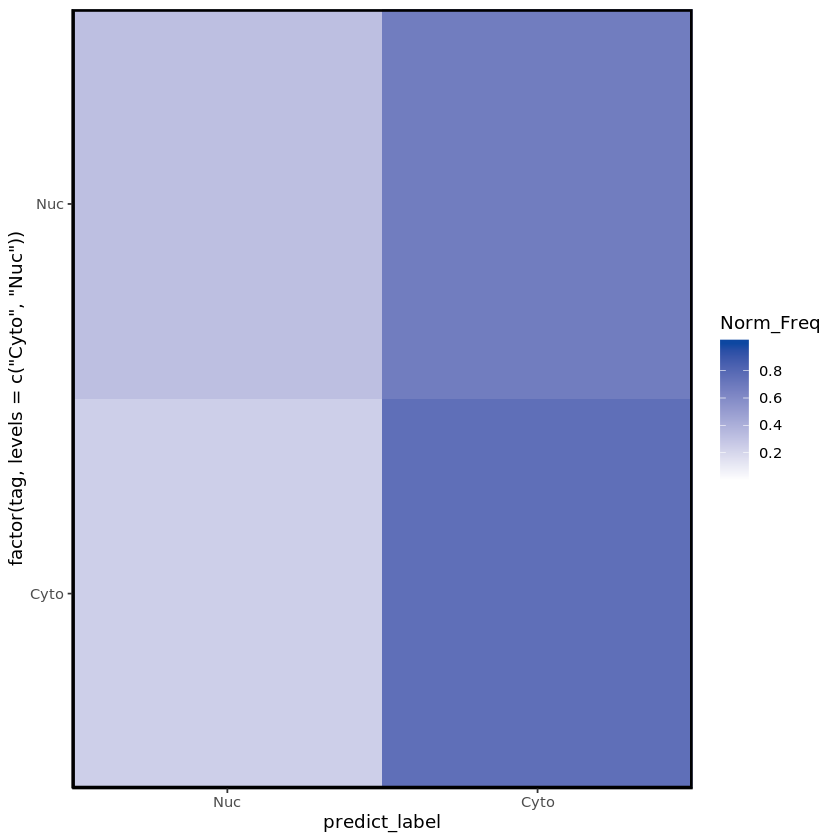

In [16]:
p <- ggplot(data =mRNALoc_freq,aes(x=predict_label,y=factor(tag,levels = c("Cyto","Nuc")),fill=Norm_Freq)) + 
geom_tile()+
theme_classic()+
theme(panel.border = element_rect(colour = "black", fill=NA,size = 1.5))+
scale_y_discrete(expand = c(0,0))+
scale_x_discrete(expand = c(0,0))+
scale_fill_gradient(limits = c(0,1), breaks = c(0.2,0.4,0.6,0.8),low = "white", high = "#0D47A1")
ggsave("./02_mRNALoc_freq_Confusion_matrix_with_text.pdf", p, width = 10, height = 10) 

p

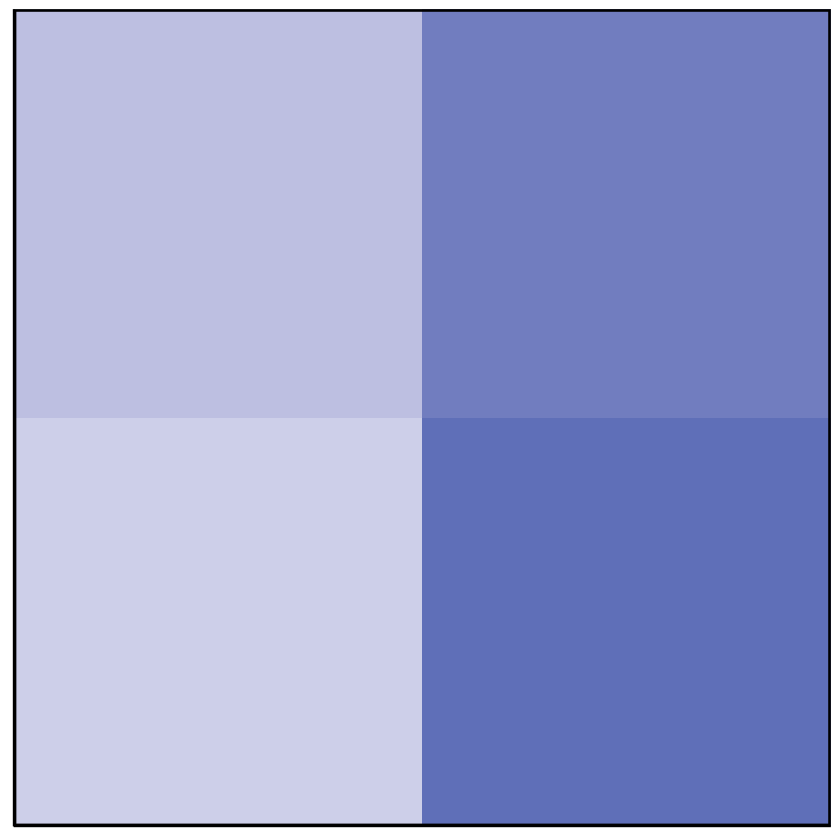

In [17]:
p <- p +theme(legend.position = "None",
         axis.text = element_blank(),
         axis.title = element_blank(),
         axis.ticks = element_blank())
ggsave("./02_mRNALoc_freq_Confusion_matrix.pdf", p, width = 10, height = 10) 

p